In [3]:
import os
os.getcwd()

'D:\\Documents\\PycharmProjects\\LEADING-RAMP'

In [4]:
import pandas as pd

https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 

In [5]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [6]:
umaryland2019 = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\ir_data\\Ramp2019\\Export\\umaryland_pc_2019.csv", parse_dates = ['date'])

In [7]:
list(umaryland2019.columns.values.tolist())

['Unnamed: 0',
 'citableContent',
 'clickThrough',
 'clicks',
 'date',
 'impressions',
 'index',
 'position',
 'url',
 'repository_id']

In [8]:
umaryland2019.head()

,Unnamed: 0,citableContent,clickThrough,clicks,date,impressions,index,position,url,repository_id
0,0,Yes,1.0,1.0,2019-01-01,1.0,md_drum_page_clicks,124.000,https://drum.lib.umd.edu/bitstream/1903/16815/...,maryland_drum
1,1,Yes,0.5,1.0,2019-01-01,2.0,md_drum_page_clicks,87.000,https://drum.lib.umd.edu/bitstream/handle/1903...,maryland_drum
2,2,Yes,0.0,0.0,2019-01-01,1.0,md_drum_page_clicks,215.000,https://drum.lib.umd.edu/bitstream/1903/11114/...,maryland_drum
3,3,Yes,0.0,0.0,2019-01-01,16.0,md_drum_page_clicks,144.875,https://drum.lib.umd.edu/bitstream/1903/12078/...,maryland_drum
4,4,Yes,0.0,0.0,2019-01-01,1.0,md_drum_page_clicks,44.000,https://drum.lib.umd.edu/bitstream/1903/12205/...,maryland_drum


In [9]:
#Or import as a time series index with date
umd2019ser = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\ir_data\\Ramp2019\\Export\\umaryland_pc_2019.csv", parse_dates = ['date'], index_col = "date")
umd2019ser.head()

,Unnamed: 0,citableContent,clickThrough,clicks,impressions,index,position,url,repository_id
date,,,,,,,,,
2019-01-01,0,Yes,1.0,1.0,1.0,md_drum_page_clicks,124.000,https://drum.lib.umd.edu/bitstream/1903/16815/...,maryland_drum
2019-01-01,1,Yes,0.5,1.0,2.0,md_drum_page_clicks,87.000,https://drum.lib.umd.edu/bitstream/handle/1903...,maryland_drum
2019-01-01,2,Yes,0.0,0.0,1.0,md_drum_page_clicks,215.000,https://drum.lib.umd.edu/bitstream/1903/11114/...,maryland_drum
2019-01-01,3,Yes,0.0,0.0,16.0,md_drum_page_clicks,144.875,https://drum.lib.umd.edu/bitstream/1903/12078/...,maryland_drum
2019-01-01,4,Yes,0.0,0.0,1.0,md_drum_page_clicks,44.000,https://drum.lib.umd.edu/bitstream/1903/12205/...,maryland_drum


In [10]:
umd2019 = umaryland2019.iloc[:, [3, 4]] #Select all rows and specific columms: clicks, date

In [11]:
#Group by Days - https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/ 
df = umd2019.groupby(pd.Grouper(key = "date", axis = 0, freq = "1D", sort = True)).sum()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clicks  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [13]:
df

,clicks
date,
2019-01-01,1196.0
2019-01-02,1747.0
2019-01-03,1842.0
2019-01-04,1701.0
2019-01-05,1435.0
...,...
2019-12-27,770.0
2019-12-28,702.0
2019-12-29,734.0


Visualization

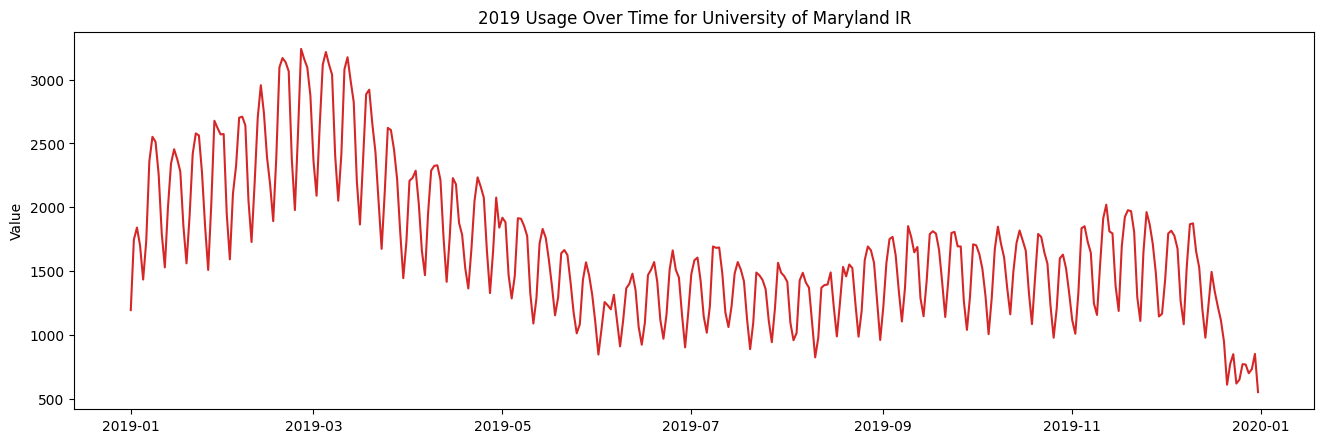

In [14]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['clicks'], title='2019 Usage Over Time for University of Maryland IR')    

In [15]:
umaryland2020 = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\ir_data\\Ramp2020\\Export\\umaryland_pc_2020.csv", parse_dates = ['date'])
umd2020 = umaryland2020.iloc[:, [3, 4]] #Select all rows and specific columms: clicks, date
df2 = umd2020.groupby(pd.Grouper(key = "date", axis = 0, freq = "1D", sort = True)).sum()

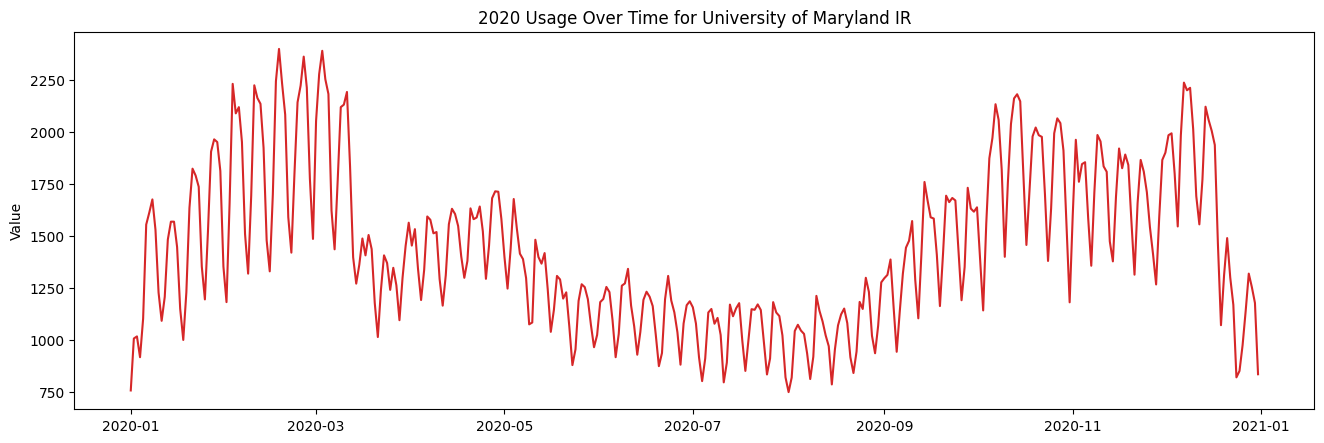

In [16]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df2, x=df2.index, y=df2['clicks'], title='2020 Usage Over Time for University of Maryland IR')    

In [17]:
umontana2019 = pd.read_csv("D:\\Documents\\PycharmProjects\\LEADING-RAMP\\ir_data\\Ramp2019\\Export\\umontana_pc_2019.csv", parse_dates = ['date'])
umontana = umaryland2019.iloc[:, [3, 4]] #Select all rows and specific columms: clicks, date
df3 = umontana.groupby(pd.Grouper(key = "date", axis = 0, freq = "1D", sort = True)).sum()

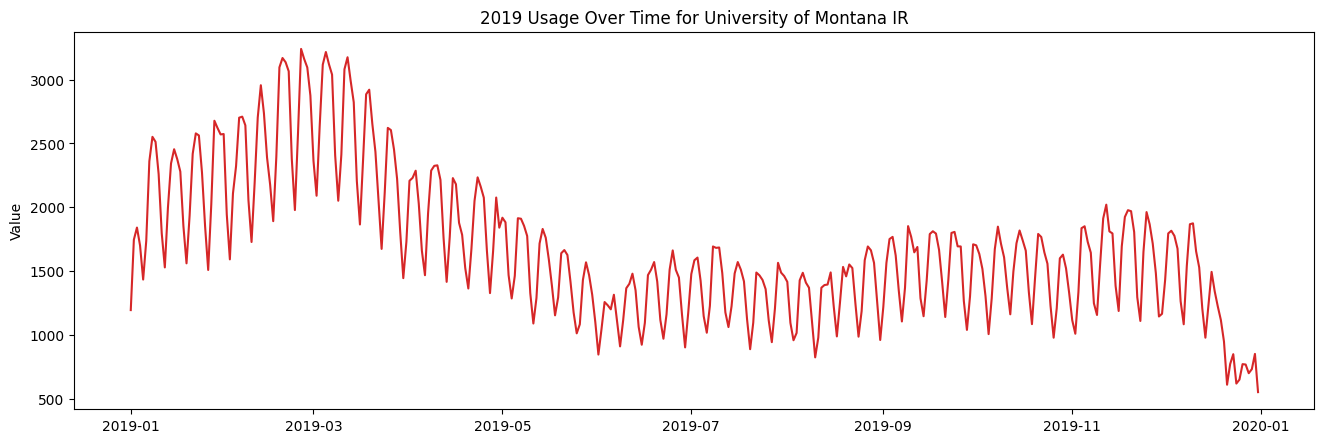

In [18]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df3, x=df3.index, y=df3['clicks'], title='2019 Usage Over Time for University of Montana IR')    

In [19]:
df3.head() #The panda groupby turned date into an index

,clicks
date,
2019-01-01,1196.0
2019-01-02,1747.0
2019-01-03,1842.0
2019-01-04,1701.0
2019-01-05,1435.0


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clicks  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   clicks  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [21]:
!pip install statsmodels

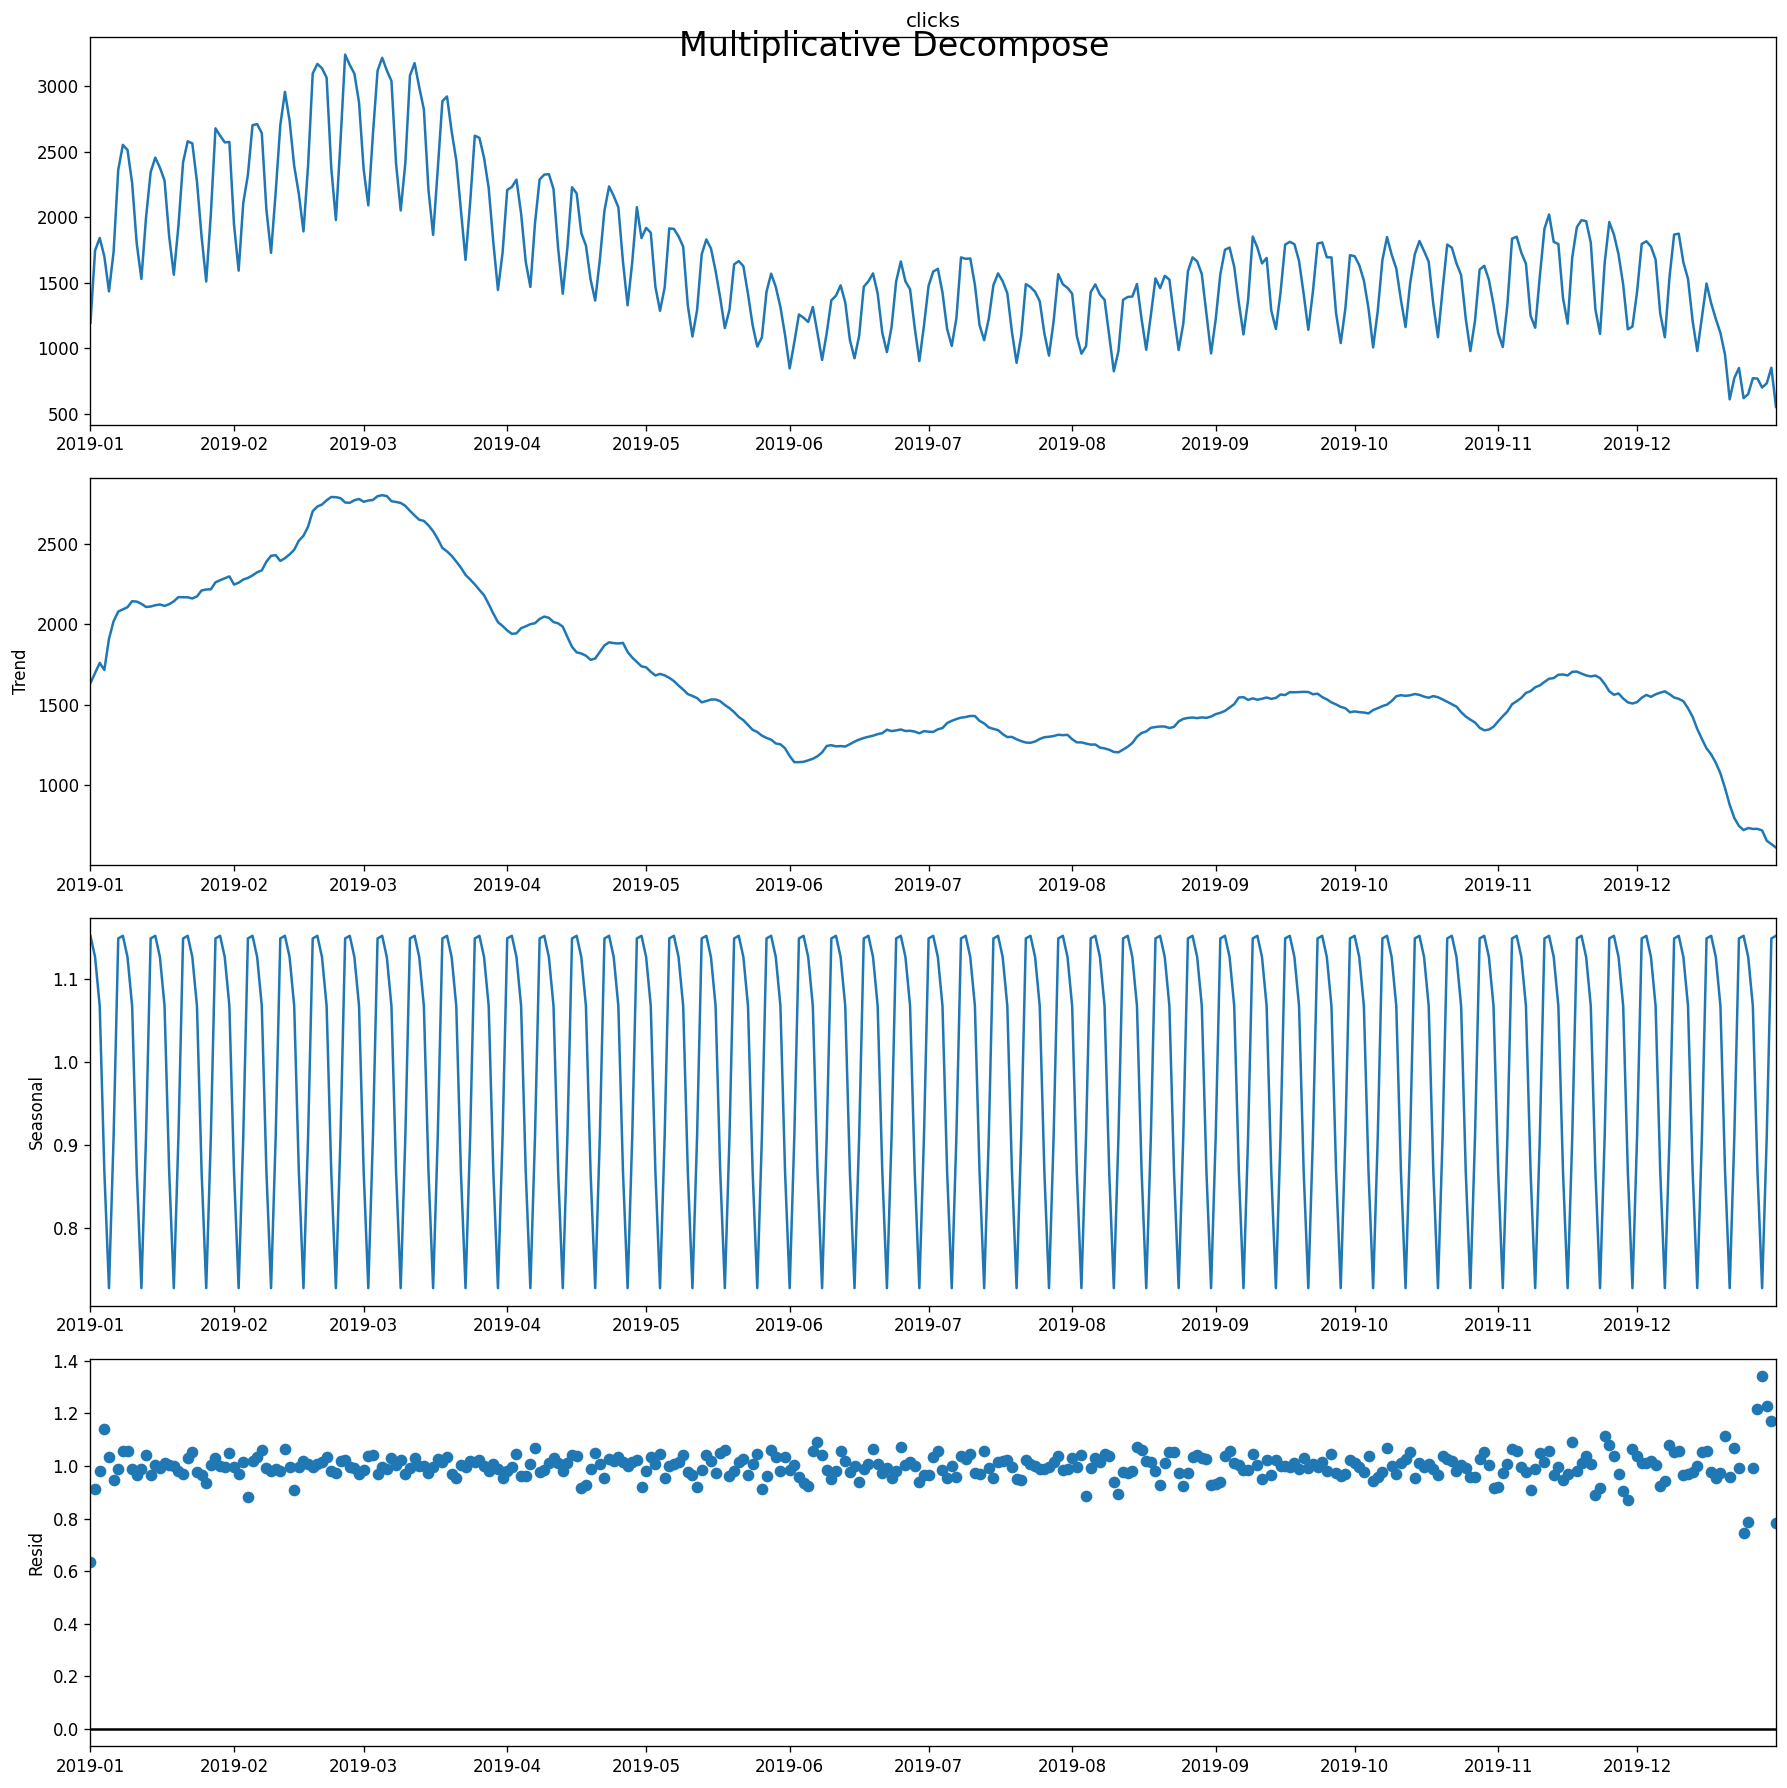

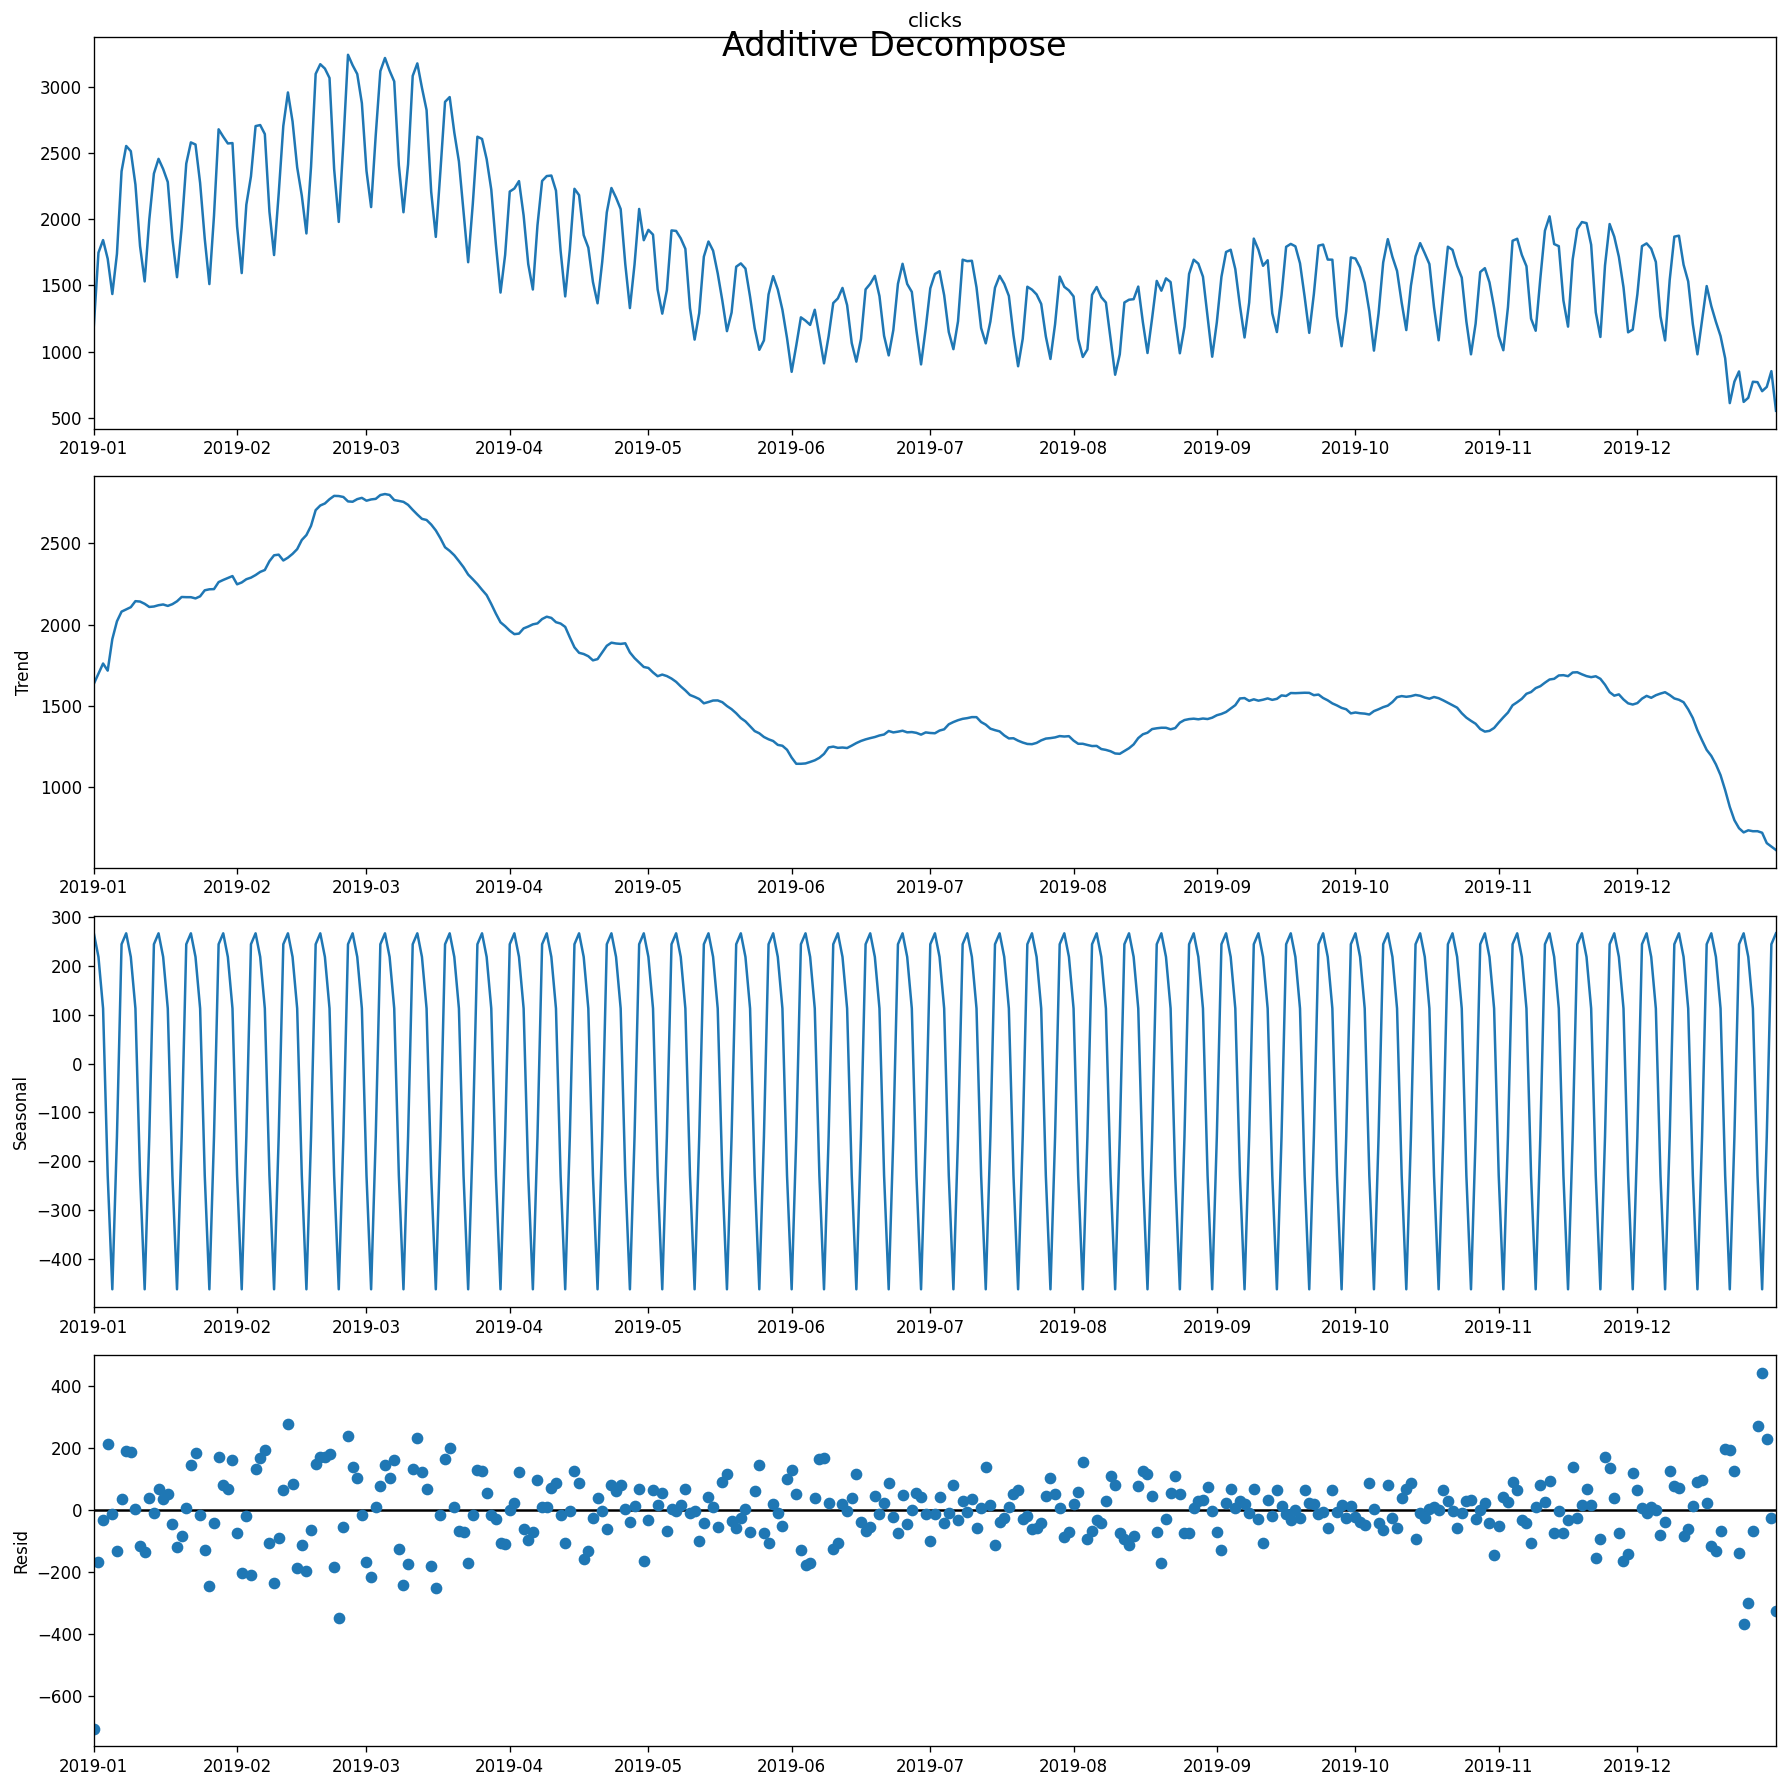

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['clicks'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['clicks'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()

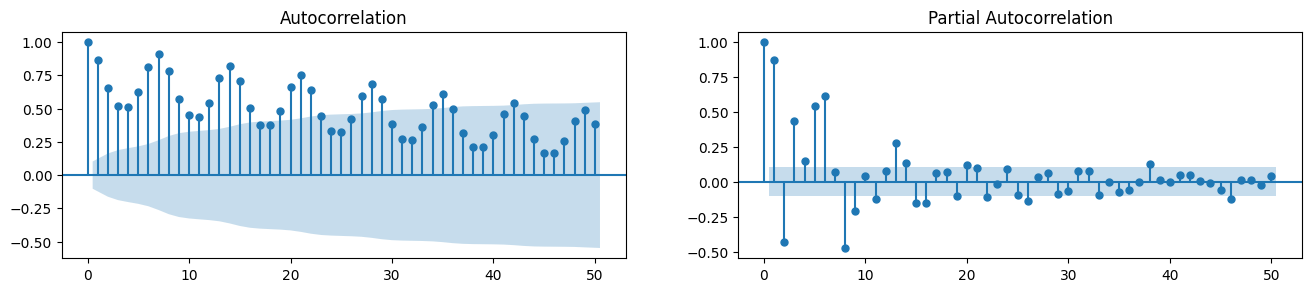

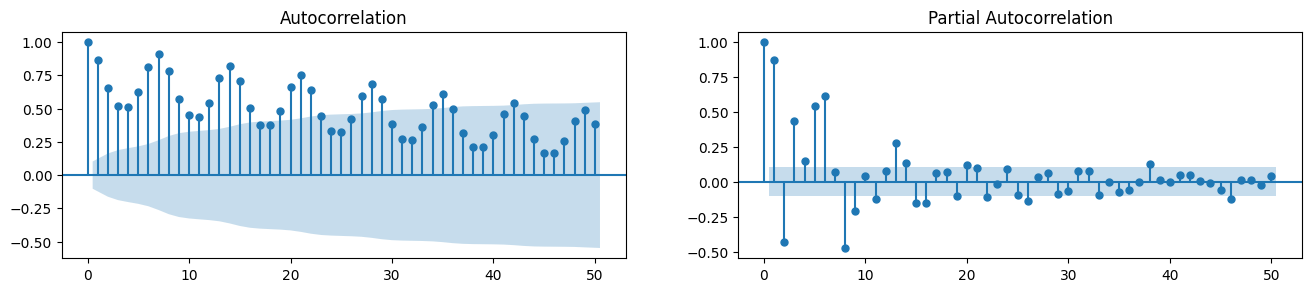

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.clicks.tolist(), lags=50, ax=axes[0])
plot_pacf(df.clicks.tolist(), lags=50, ax=axes[1])